# Model creation

## Libs

In [1]:
from prepareRSSI import RssiDatas
import pandas as pd
import parameters as param
import numpy as np
import tensorflow as tf
#import intel-tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K # to set the learning rate

## Import the RSSI, mac and zones values

In [2]:
RSSI = RssiDatas()

rssi_tmp = np.genfromtxt(param.rssi_csv_output, delimiter=',')
# deleting index column and row :
rssi_tmp = np.delete(rssi_tmp, 0, 1)
RSSI.rssi = np.delete(rssi_tmp, 0, 0)

mac_tmp = np.genfromtxt(param.mac_csv_output, delimiter=',', dtype=str)
# deleting index column and row :
mac_tmp = mac_tmp[:,1] # keep only the column with the mac adresses
RSSI.mac = np.delete(mac_tmp, 0) # delete the first row because empty

zones_tmp = np.genfromtxt(param.zones_csv_output, delimiter=',')
# deleting index column and row :
zones_tmp = zones_tmp[:,1] # keep only the colomn with the zone ids
RSSI.zones = np.delete(zones_tmp, 0, 0) # delete the first row because empty

## Pre load datas into model

In [3]:
print("RSSI.rssi : ", np.shape(RSSI.rssi))
print("RSSI.zones : ", np.shape(RSSI.zones))
zonesNb = 7 # number of zones

# create the zone output array of vectors :
y_zones = np.zeros([np.size(RSSI.zones), zonesNb])
for i in range(np.size(RSSI.zones)):
    y_zones[i, int(RSSI.zones[i])] = 1

train_data, test_data, train_labels, test_labels = train_test_split(RSSI.rssi,y_zones)
print("train_data : ", np.shape(train_data))
print("train_labels : ", np.shape(train_labels))
print("test_data : ", np.shape(test_data))
print("test_labels : ", np.shape(test_labels))
# normalize the RSSI values from 0 to 1
train_data = train_data/(-95)
test_data = test_data/(-95)

RSSI.rssi :  (265, 128)
RSSI.zones :  (265,)
train_data :  (198, 128)
train_labels :  (198, 7)
test_data :  (67, 128)
test_labels :  (67, 7)


## Create the model

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(np.size(RSSI.mac), activation='relu'),
  tf.keras.layers.Dropout(param.dropout),
  tf.keras.layers.Dense(np.size(RSSI.mac), activation='relu'),
  tf.keras.layers.Dropout(param.dropout),
  tf.keras.layers.Dense(np.size(RSSI.mac), activation='relu'),
  tf.keras.layers.Dropout(param.dropout),
  tf.keras.layers.Dense(7)
])

## Compile the model

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])
K.set_value(model.optimizer.learning_rate, param.learningRate)

## Train the model

In [6]:
history = model.fit(train_data, train_labels,
                    epochs=param.epochs,
                    validation_data=(test_data, test_labels))

Epoch 1/1000
7/7 [==============================] - 0s 16ms/step - loss: 0.6930 - accuracy: 0.1667 - val_loss: 0.3453 - val_accuracy: 0.2239
Epoch 2/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.4382 - accuracy: 0.1162 - val_loss: 0.2001 - val_accuracy: 0.2239
Epoch 3/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.3128 - accuracy: 0.1414 - val_loss: 0.1469 - val_accuracy: 0.2836
Epoch 4/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.2526 - accuracy: 0.1515 - val_loss: 0.1285 - val_accuracy: 0.2836
Epoch 5/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.2301 - accuracy: 0.1667 - val_loss: 0.1221 - val_accuracy: 0.3284
Epoch 6/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.2160 - accuracy: 0.1515 - val_loss: 0.1202 - val_accuracy: 0.2985
Epoch 7/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.2018 - accuracy: 0.1414 - val_loss: 0.1198 - val_accuracy: 0.2687
Epoch 8/1000
7/7 [=

7/7 [==============================] - 0s 3ms/step - loss: 0.1241 - accuracy: 0.1919 - val_loss: 0.1151 - val_accuracy: 0.4328
Epoch 60/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1223 - accuracy: 0.2424 - val_loss: 0.1151 - val_accuracy: 0.4627
Epoch 61/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1193 - accuracy: 0.2576 - val_loss: 0.1153 - val_accuracy: 0.5672
Epoch 62/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1204 - accuracy: 0.2677 - val_loss: 0.1154 - val_accuracy: 0.4776
Epoch 63/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1219 - accuracy: 0.2475 - val_loss: 0.1150 - val_accuracy: 0.4478
Epoch 64/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1222 - accuracy: 0.2273 - val_loss: 0.1147 - val_accuracy: 0.4328
Epoch 65/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1204 - accuracy: 0.2424 - val_loss: 0.1140 - val_accuracy: 0.4925
Epoch 66/1000
7/7 [========

7/7 [==============================] - 0s 3ms/step - loss: 0.1055 - accuracy: 0.4545 - val_loss: 0.1013 - val_accuracy: 0.6716
Epoch 118/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1043 - accuracy: 0.4545 - val_loss: 0.1011 - val_accuracy: 0.6418
Epoch 119/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1047 - accuracy: 0.4798 - val_loss: 0.1013 - val_accuracy: 0.7313
Epoch 120/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1040 - accuracy: 0.4848 - val_loss: 0.1010 - val_accuracy: 0.6567
Epoch 121/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1022 - accuracy: 0.5101 - val_loss: 0.1010 - val_accuracy: 0.6567
Epoch 122/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1004 - accuracy: 0.5909 - val_loss: 0.1011 - val_accuracy: 0.6567
Epoch 123/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1016 - accuracy: 0.4697 - val_loss: 0.1005 - val_accuracy: 0.5821
Epoch 124/1000
7/7 [=

Epoch 175/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0795 - accuracy: 0.7222 - val_loss: 0.0729 - val_accuracy: 0.8507
Epoch 176/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0762 - accuracy: 0.7727 - val_loss: 0.0740 - val_accuracy: 0.8358
Epoch 177/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0812 - accuracy: 0.6869 - val_loss: 0.0710 - val_accuracy: 0.8060
Epoch 178/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0783 - accuracy: 0.7677 - val_loss: 0.0715 - val_accuracy: 0.8806
Epoch 179/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0748 - accuracy: 0.7677 - val_loss: 0.0704 - val_accuracy: 0.8657
Epoch 180/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0763 - accuracy: 0.7727 - val_loss: 0.0709 - val_accuracy: 0.8358
Epoch 181/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0783 - accuracy: 0.7172 - val_loss: 0.0711 - val_accuracy: 0.8209
Epoch 

Epoch 233/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0585 - accuracy: 0.8586 - val_loss: 0.0498 - val_accuracy: 0.8806
Epoch 234/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0595 - accuracy: 0.8384 - val_loss: 0.0488 - val_accuracy: 0.9254
Epoch 235/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0568 - accuracy: 0.8687 - val_loss: 0.0492 - val_accuracy: 0.9104
Epoch 236/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.8586 - val_loss: 0.0497 - val_accuracy: 0.9254
Epoch 237/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0559 - accuracy: 0.9040 - val_loss: 0.0485 - val_accuracy: 0.9104
Epoch 238/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0558 - accuracy: 0.8586 - val_loss: 0.0478 - val_accuracy: 0.8955
Epoch 239/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0571 - accuracy: 0.8939 - val_loss: 0.0475 - val_accuracy: 0.9104
Epoch 

Epoch 291/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0429 - accuracy: 0.8990 - val_loss: 0.0361 - val_accuracy: 0.9104
Epoch 292/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0455 - accuracy: 0.9141 - val_loss: 0.0363 - val_accuracy: 0.9254
Epoch 293/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.9394 - val_loss: 0.0370 - val_accuracy: 0.9104
Epoch 294/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0445 - accuracy: 0.9091 - val_loss: 0.0371 - val_accuracy: 0.9104
Epoch 295/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0434 - accuracy: 0.9495 - val_loss: 0.0353 - val_accuracy: 0.9254
Epoch 296/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0400 - accuracy: 0.9293 - val_loss: 0.0353 - val_accuracy: 0.9403
Epoch 297/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0450 - accuracy: 0.9242 - val_loss: 0.0354 - val_accuracy: 0.9403
Epoch 

Epoch 349/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.9444 - val_loss: 0.0288 - val_accuracy: 0.9701
Epoch 350/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9394 - val_loss: 0.0294 - val_accuracy: 0.9403
Epoch 351/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9646 - val_loss: 0.0283 - val_accuracy: 0.9403
Epoch 352/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9545 - val_loss: 0.0281 - val_accuracy: 0.9552
Epoch 353/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9848 - val_loss: 0.0284 - val_accuracy: 0.9552
Epoch 354/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9596 - val_loss: 0.0273 - val_accuracy: 0.9552
Epoch 355/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0330 - accuracy: 0.9343 - val_loss: 0.0281 - val_accuracy: 0.9552
Epoch 

Epoch 407/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0288 - accuracy: 0.9747 - val_loss: 0.0225 - val_accuracy: 0.9552
Epoch 408/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9747 - val_loss: 0.0217 - val_accuracy: 0.9552
Epoch 409/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9646 - val_loss: 0.0211 - val_accuracy: 0.9552
Epoch 410/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9798 - val_loss: 0.0220 - val_accuracy: 0.9701
Epoch 411/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9747 - val_loss: 0.0239 - val_accuracy: 0.9701
Epoch 412/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9646 - val_loss: 0.0229 - val_accuracy: 0.9552
Epoch 413/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9747 - val_loss: 0.0223 - val_accuracy: 0.9552
Epoch 

Epoch 465/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9697 - val_loss: 0.0186 - val_accuracy: 0.9701
Epoch 466/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9899 - val_loss: 0.0178 - val_accuracy: 0.9701
Epoch 467/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9646 - val_loss: 0.0175 - val_accuracy: 0.9701
Epoch 468/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9899 - val_loss: 0.0179 - val_accuracy: 0.9552
Epoch 469/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9798 - val_loss: 0.0184 - val_accuracy: 0.9701
Epoch 470/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9798 - val_loss: 0.0182 - val_accuracy: 0.9701
Epoch 471/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9747 - val_loss: 0.0196 - val_accuracy: 0.9403
Epoch 

Epoch 523/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 1.0000 - val_loss: 0.0153 - val_accuracy: 0.9701
Epoch 524/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9899 - val_loss: 0.0167 - val_accuracy: 0.9851
Epoch 525/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9899 - val_loss: 0.0158 - val_accuracy: 0.9701
Epoch 526/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9899 - val_loss: 0.0159 - val_accuracy: 0.9701
Epoch 527/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0211 - accuracy: 0.9848 - val_loss: 0.0151 - val_accuracy: 0.9701
Epoch 528/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9798 - val_loss: 0.0159 - val_accuracy: 0.9701
Epoch 529/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9949 - val_loss: 0.0162 - val_accuracy: 0.9851
Epoch 

Epoch 581/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9949 - val_loss: 0.0130 - val_accuracy: 0.9851
Epoch 582/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 583/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9798 - val_loss: 0.0118 - val_accuracy: 0.9851
Epoch 584/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9848 - val_loss: 0.0128 - val_accuracy: 0.9851
Epoch 585/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0195 - accuracy: 0.9848 - val_loss: 0.0149 - val_accuracy: 0.9851
Epoch 586/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0204 - accuracy: 0.9798 - val_loss: 0.0140 - val_accuracy: 0.9851
Epoch 587/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9848 - val_loss: 0.0143 - val_accuracy: 0.9851
Epoch 

Epoch 639/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9949 - val_loss: 0.0101 - val_accuracy: 0.9851
Epoch 640/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.9899 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 641/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9949 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 642/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9949 - val_loss: 0.0112 - val_accuracy: 0.9851
Epoch 643/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 644/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 0.9798 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 645/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9848 - val_loss: 0.0120 - val_accuracy: 0.9851
Epoch 

Epoch 697/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9899 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 698/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9848 - val_loss: 0.0102 - val_accuracy: 0.9851
Epoch 699/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 0.9851
Epoch 700/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.9848 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 701/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9949 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 702/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 0.9851
Epoch 703/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 0.9899 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 

Epoch 755/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9899 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 756/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 0.9851
Epoch 757/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.9949 - val_loss: 0.0079 - val_accuracy: 0.9851
Epoch 758/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 0.9851
Epoch 759/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.0086 - val_accuracy: 0.9851
Epoch 760/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9949 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 761/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 

Epoch 813/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 814/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0135 - accuracy: 0.9949 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 815/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 0.9851
Epoch 816/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9949 - val_loss: 0.0084 - val_accuracy: 0.9851
Epoch 817/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 818/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9899 - val_loss: 0.0084 - val_accuracy: 0.9851
Epoch 819/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 

Epoch 871/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 872/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9949 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 873/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9949 - val_loss: 0.0079 - val_accuracy: 0.9851
Epoch 874/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9848 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 875/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 876/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 877/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9949 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 

Epoch 929/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9899 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 930/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 931/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.9949 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 932/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 933/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 934/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 935/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 

Epoch 987/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9949 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 988/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.9949 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 989/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 990/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 991/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 992/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9848 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 993/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 

## Ploting learning datas

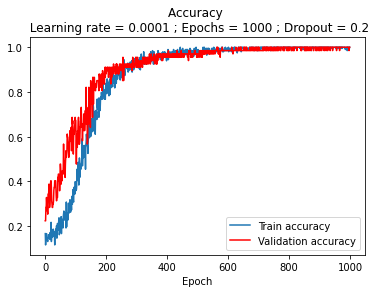

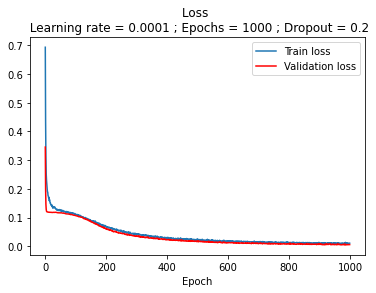

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(1)
plt.plot(acc, label="Train accuracy")
plt.plot(val_acc,color="red", label="Validation accuracy")
plt.legend(loc="lower right")
plt.title("Accuracy \n Learning rate = " + str(param.learningRate) + " ; Epochs = " + str(param.epochs) + " ; Dropout = " + str(param.dropout))
plt.xlabel("Epoch")
name = param.plot_saving_location + "plot_accuracy_lr_" + str(param.learningRate) + "_ep_" + str(param.epochs) + "_dr_" + str(param.dropout) + ".pdf"
name = name.replace(".", ",", 2) # replace the two first dots
plt.savefig(name, format="pdf")

plt.figure(2)
plt.plot(loss, label="Train loss")
plt.plot(val_loss,color="red", label="Validation loss")
plt.legend(loc="upper right")
plt.title("Loss \n Learning rate = " + str(param.learningRate) + " ; Epochs = " + str(param.epochs) + " ; Dropout = " + str(param.dropout))
plt.xlabel("Epoch")
name = param.plot_saving_location + "plot_loss_lr_" + str(param.learningRate) + "_ep_" + str(param.epochs) + "_dr_" + str(param.dropout) + ".pdf"
name = name.replace(".", ",", 2)
plt.savefig(name, format="pdf")

